# TJCTF 2023
## Baby-rsa
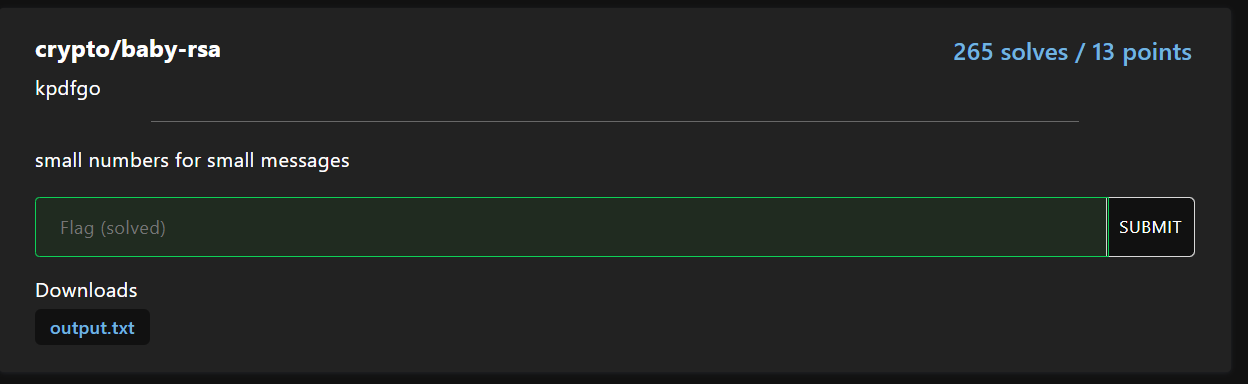
- [output.txt](https://github.com/tvdat20004/CTF_write-up/blob/main/TJCTF2023/baby-rsa/output.txt)
- Đây là một bài RSA với public exponent nhỏ (e = 3), trong phần mô tả đề bài lại gợi ý cho chúng ta là "small message" => m nhỏ. Lúc này ciphertext là $c = m^3\text{ (mod n)}$. Vì m nhỏ nên m3 < n, khi đó phép toán module không có tác dụng. Vì vậy để tìm ngược lại c, mình chỉ việc tính $m = c^{\frac{1}{3}}$

In [1]:
n = 10888751337932558679268839254528888070769213269691871364279830513893837690735136476085167796992556016532860022833558342573454036339582519895539110327482234861870963870144864609120375793020750736090740376786289878349313047032806974605398302398698622431086259032473375162446051603492310000290666366063094482985737032132318650015539702912720882013509099961316767073167848437729826084449943115059234376990825162006299979071912964494228966947974497569783878833130690399504361180345909411669130822346252539746722020515514544334793717997364522192699435604525968953070151642912274210943050922313389271251805397541777241902027
e = 3
c = 2449457955338174702664398437699732241330055959255401949300755756893329242892325068765174475595370736008843435168081093064803408113260941928784442707977000585466461075146434876354981528996602615111767938231799146073229307631775810351487333
from Crypto.Util.number import long_to_bytes
import gmpy2 
m = gmpy2.iroot(c,3)[0]
print(long_to_bytes(m))

b'tjctf{thr33s_4r3_s0_fun_fb23d5ed}'


## ezdlp
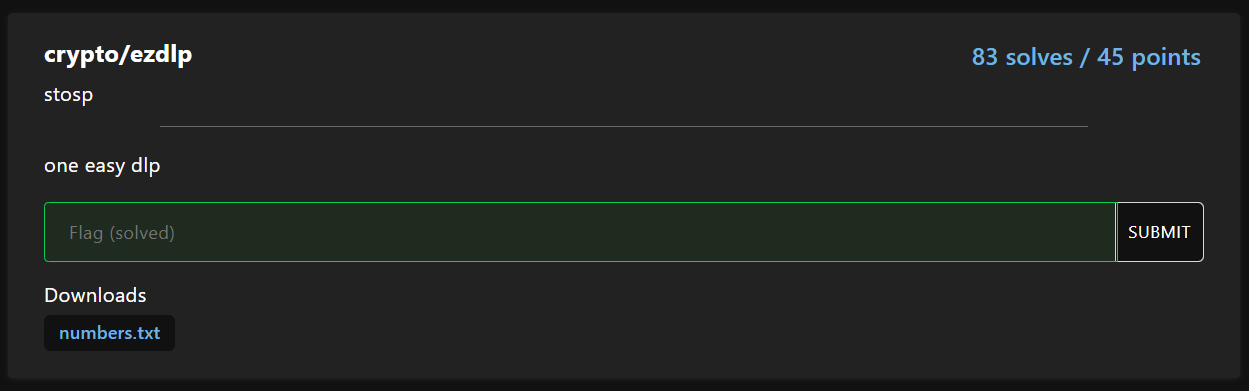
- [number.txt](https://github.com/tvdat20004/CTF_write-up/blob/main/TJCTF2023/ezldlp/numbers.txt)
- Thử thách này đưa cho ta một bài toán tìm x với $g^x = s\text{ (mod p)}$; g,s,p là các số đã biết. Dễ dàng thấy đây là bài toán về [discrete logarithm](https://en.wikipedia.org/wiki/Discrete_logarithm).
- Sagemath cung cấp cho ta công cụ giải quyết bài này khá nhanh ([đây](https://doc.sagemath.org/html/en/reference/finite_rings/sage/rings/finite_rings/integer_mod.html#sage.rings.finite_rings.integer_mod.IntegerMod_abstract.log) là chi tiết và cách dùng của hàm)

In [2]:
g = 8999
s = 11721478752747238947534577901795278971298347908127389421908790123
p = 12297383901740584470151577318651150337988716807049317851420298478128932232846789427512414204247770572072680737351875225891650166807323215624748551744377958007176198392481481171792078565005580006750936049744616851983231170824931892761202881982041842121034608612146861881334101500003915726821683000760611763097
x = (Mod(s,p)).log(g)
print(x)

26104478854569770948763268629079094351020764258425704346666185171631094713742516526074910325202612575130356252792856014835908436517926646322189289728462011794148513926930343382081388714077889318297349665740061482743137948635476088264751212120906948450722431680198753238856720828205708702161666784517


## iheartrsa
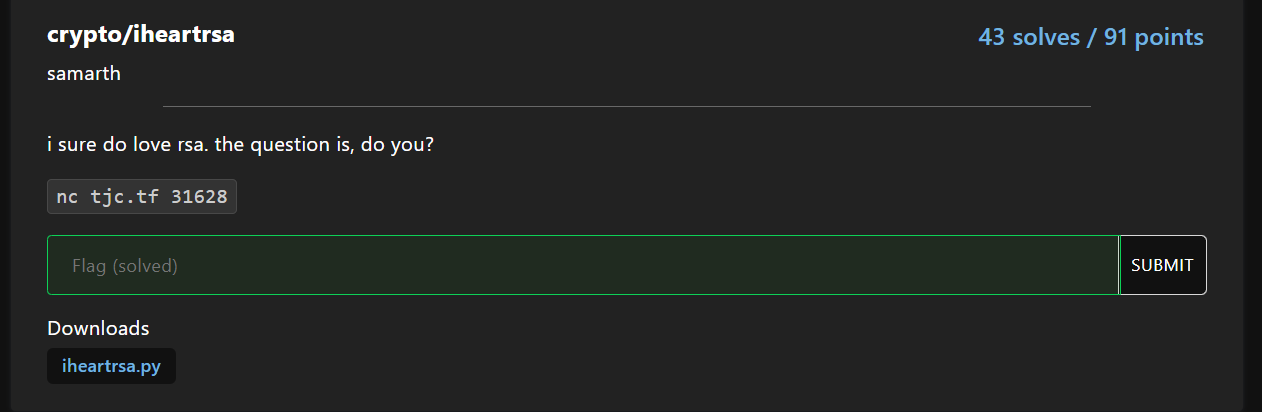
- Soure code:

In [ ]:
#!/usr/local/bin/python3.10 -u

import ast
import sys

import select
from Crypto.Util import number
import hashlib

with open('flag.txt') as f:
    flag = f.readline()

raw_bin = str(
    bin(int('0x'+str(hashlib.sha256(flag.encode('utf-8')).hexdigest()), 16))[2:])
hsh = int('0b1' + '0' * (256 - len(raw_bin)) + raw_bin, 2)

p = number.getPrime(1024)
q = number.getPrime(1024)
n = p * q
e = 0

for i in range(0, 100):
    if pow(hsh, i) >= n:
        e = i
        break

m = pow(hsh, e, n)
print(f'm: {m}')
print(f'n: {n}')


def input_with_timeout(prompt, timeout):
    sys.stdout.write(prompt)
    sys.stdout.flush()
    ready, _, _ = select.select([sys.stdin], [], [], timeout)
    if ready:
        return sys.stdin.readline().rstrip('\n')
    raise Exception


try:
    answer = input_with_timeout('', 20)
    try:
        answer = ast.literal_eval(answer)
        if hsh == answer:
            print('you love rsa so i <3 you :DD')
            print(flag)
        else:
            print("im upset")
    except Exception as e:
        print("im very upset")
except Exception as e:
    print("\nyou've let me down :(")

- Đây là một thử thách RSA, cụ thể sau khi netcat vào server, họ sẽ cung cấp 2 số m,n. Nhiệm vụ của chúng ta là tìm giá trị của `hsh`, nếu tìm đúng, server sẽ gởi lại cho ta flag.
- Ở đây, họ tạo e bằng cách tìm số e nhỏ nhất sao cho `hsh^e >= n`, i thuộc khoảng từ 1 tới 100. Ở đây mình sẽ dùng phép thử sau để tìm e (hơi tà đạo :)))

In [5]:
import hashlib
flag1 = 'tjctf{aaaaa}'
flag2 = 'tjctf{aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa}'
flag3 = 'tjctf{aaaaaaaaaaaaaaaaaaaaaaaa}'
n = 14457187607874869213039015485206702511428688687137630158495121214327879587033651160662996569314331190269107067493499408706135563395879741231592940240342314463102055434056143229630796993773074909968097910845994389135381778364710657016964953421359045950998422474236721996201281420768935828275029669678394947873034636407300556662177458917539188364962833937409232767873848675460330287266153688227981487667468716579167813895143410064508306577847771964601528990387470344716224694682552156534461701485443980767170554113718519526959417943309692897906292794730558811143285435980523010614163610838057069957693937896503591874619
m = 158074867710147204008831922538780335128399235943762939972254445049226666929140704494407469959477675591361173114618008290111698289078307025270180454503017813091464571988696332043391000128105356238462195601585714151981136533791126254244367388414254637800691497393553587818077944389037864462922610978145839837659167620212298715350220181796591747722791660689297121522985473543020282502562564127780433006101447592255518215938559489539924297015884125911008653036478498672724629349470035832837351838088189176967885284241119026083418780670849777058199916251437033209534092375954239720900448320646483225009137558891307464236
def calculate_e(flag):
    raw_bin = str(bin(int('0x'+str(hashlib.sha256(flag1.encode('utf-8')).hexdigest()), 16))[2:])
    hsh = int('0b1' + '0' * (256 - len(raw_bin)) + raw_bin, 2)
    for i in range(0, 100):
        if pow(hsh, i) >= n:
            return i
            break
print(calculate_e(flag1))
print(calculate_e(flag2))
print(calculate_e(flag3))

8
8
8


- Mình cho 3 flag mẫu có độ dài lần lượt dài ngắn khác nhau, sau đó tính ra giá trị e bằng đoạn code mà đề cung cấp, kết quả ta đều thu được e = 8 (tất nhiên mình có thử rất nhiều mẫu flag khác và đều cho ra e = 8). Vậy nên mình mạnh dạn cho e = 8 để tính toán. 
- Ta có `m = hsh^e mod n => hsh^e = m + k*n` với k nguyên dương, và vì e là số nhỏ nhất làm cho `hsh^8 >= n` nên khá chắc rằng giá trị của k không hề cao, vì vậy ta nghĩ đến phương án brute-force giá trị k để tìm k sao cho `m + k*n` là lũy thừa bậc 8 của 1 số. 

In [7]:
import gmpy2
from Crypto.Util.number import long_to_bytes

e = 8
k = 1
while True:
    h = m + k*n
    hsh = gmpy2.iroot(h,e)[0]
    if hsh**e == h:
        print(k)
        break
    k += 1
print(hsh)

15
146913410772757766194482407144214295333114411765260602423197339861209058274813


- Chỉ với k = 15, ta đã có được giá trị hsh, giờ chỉ cần netcat vào server là lấy flag thôi...

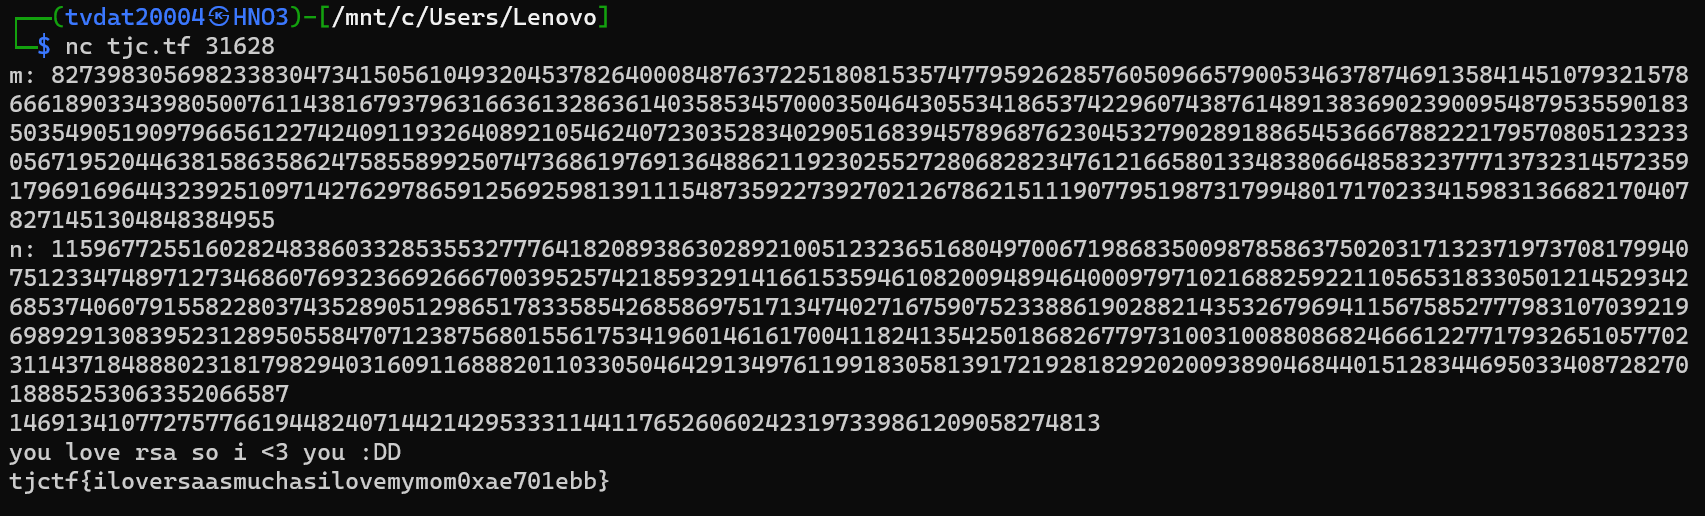


## e
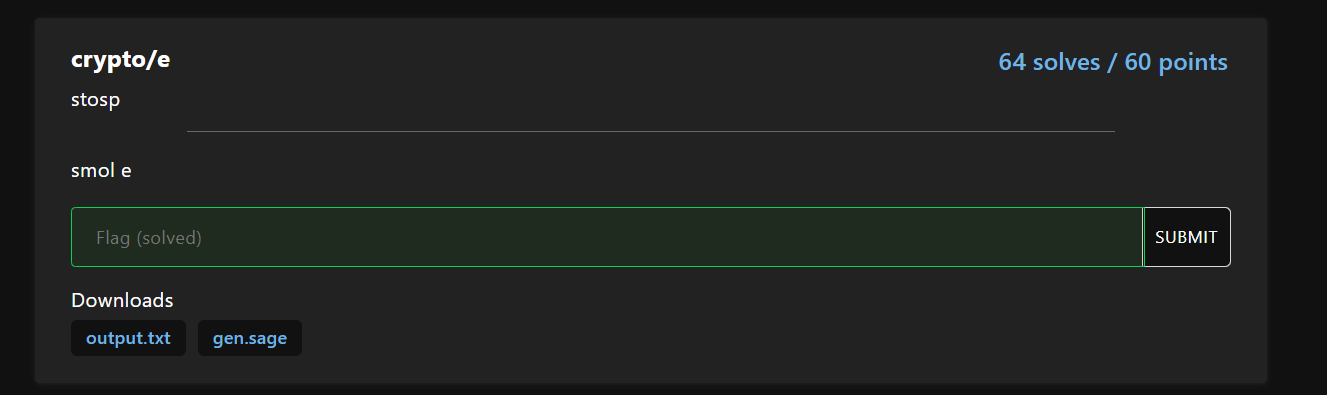
- Source code:

In [ ]:
from Crypto.Util.number import bytes_to_long

p = random_prime(2 ^ 650)
q = random_prime(2 ^ 650)
N = p*q
e = 5
flag = open("flag.txt", "rb").read().strip()
m = bytes_to_long(b'the challenges flag is ' + flag)
c = m ^ e % N
print("N: ", N)
print("C: ", c)
print("e: ", e)

- [output.txt](https://github.com/tvdat20004/CTF_write-up/blob/main/TJCTF2023/e/output.txt)
- Đây là một bài mà ta đã biết được một phần của plaintext, với dạng này, ta sẽ dùng [coppersmith attack](https://en.wikipedia.org/wiki/Coppersmith%27s_attack)
- Cụ thể, ta sẽ đặt flag đoạn plaintext chứa flag là b'the challenges flag is tjctf{\x00\x00\x00\x00\x00\x00', các null bytes được thêm ở sau được xem như các ký tự còn thiếu trong plaintext. Vì chưa biết flag có bao nhiêu ký tự nên ta sẽ brute-force số null bytes.
- Sau đó, ta định nghĩa một đa thức trên Z/nZ là `pol = (m + x)^e - C` với C được cho trước, m là bytes_to_long của plaintext. Dùng phương thức small_root để tìm nghiệm của đa thức, từ đó tìm được flag.

In [8]:
import gmpy2
from Crypto.Util.number import long_to_bytes, bytes_to_long,getPrime
N = 853008036761402960429244085500226305898326229049062709229066738337581395441559298620215547481097485360068401045559533084692445386310317304293873811639421668853703030998563380404046228010704173349786419154143323587451196441095743638783569173579503503557413613700490069592150975220823978641111437607374483116682547794651693986279540940965888470663234601045413512056249535670198419685119952947
C = 298700332507654723773580072855784292117810966958600234446114828082727445272393622869719877676272804981941548843479760604983256960593285221389548684954375981617049731866256547635842115184695147132731165168615990125469633018271766466825307769730709868985624843944432541800012321786587028293887532995722347604510229248766961319729482167555605707032678858635163105035385522888663577785577519392
e = 5
msg = b"the challenges flag is tjctf{\x00\x00\x00\x00\x00\x00"
roots = []
P.<x> = PolynomialRing(Zmod(N), implementation='NTL')

while len(roots) == 0:
    msg += b'\x00'
    m = bytes_to_long(msg)
    pol = (m + x)^e - C
    roots = pol.small_roots(epsilon = 1/30)

for root in roots:
    print(long_to_bytes(m+int(root)))

b'the challenges flag is tjctf{coppersword2}'


## Merky-hell
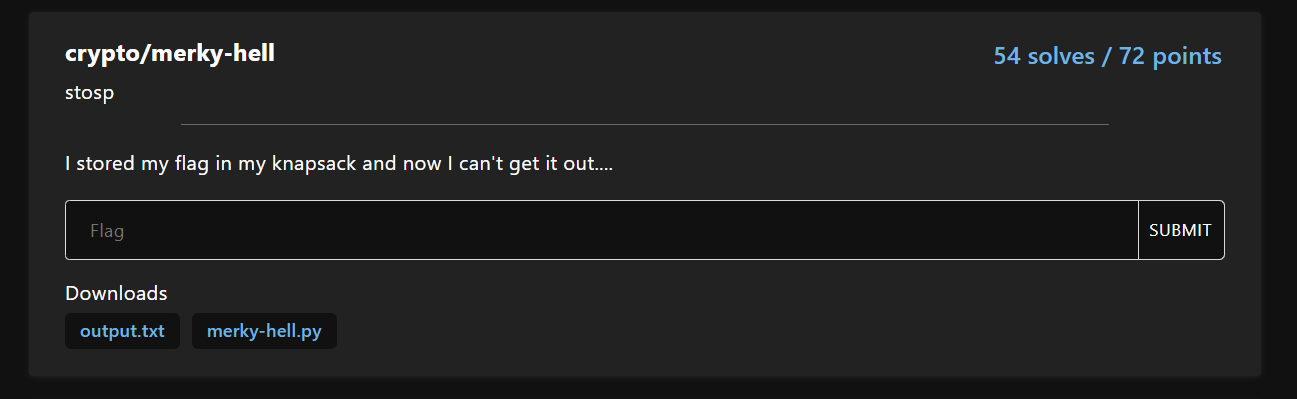
- [output.txt](https://github.com/tvdat20004/CTF_write-up/blob/main/TJCTF2023/merky-hell/output.txt)
- Đây là một challenge mà mình làm được sau khi giải kết thúc (sau khi được bổ trợ một chút kiến thức về knapsack), thông thường những bài knapsack sẽ có 2 cách làm phổ biến:
    - [Lenstra–Lenstra–Lovász (LLL) lattice basis reduction](https://en.wikipedia.org/wiki/Lenstra%E2%80%93Lenstra%E2%80%93Lov%C3%A1sz_lattice_basis_reduction_algorithm).
    - [Low Density attack on low-density knapsacks](https://static.aminer.org/pdf/PDF/000/119/853/solving_low_density_knapsacks.pdf).
- Thông thường mình sẽ chọn cách làm LLL, nhưng không hiểu sao nó không cho ra kết quả mong muốn :)) nên mình chuyển sang Low density attack. Source code mình lấy ở [đây](https://github.com/jvdsn/crypto-attacks/blob/master/attacks/knapsack/low_density.py)

In [3]:
import os
import sys
from math import ceil
from math import log2
from math import sqrt
from Crypto.Util.number import *
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
# path = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.path.abspath(__file__)))))
# if sys.path[1] != path:
#     sys.path.insert(1, path)

# from shared.lattice import shortest_vectors
import logging
def shortest_vectors(B):
    """
    Computes the shortest non-zero vectors in a lattice.
    :param B: the basis of the lattice
    :return: a generator generating the shortest non-zero vectors
    """
    logging.debug(f"Computing shortest vectors in {B.nrows()} x {B.ncols()} matrix...")
    B = B.LLL()

    for row in B.rows():
        if not row.is_zero():
            yield row

def attack(a, s):
    """
    Tries to find e_i values such that sum(e_i * a_i) = s.
    This attack only works if the density of the a_i values is < 0.9048.
    More information: Coster M. J. et al., "Improved low-density subset sum algorithms"
    :param a: the a_i values
    :param s: the s value
    :return: the e_i values, or None if the e_i values were not found
    """
    n = len(a)
    d = n / log2(max(a))
    N = ceil(1 / 2 * sqrt(n))
    assert d < 0.9408, f"Density should be less than 0.9408 but was {d}."

    L = matrix(QQ, n + 1, n + 1)
    for i in range(n):
        L[i, i] = 1
        L[i, n] = N * a[i]

    L[n] = [1 / 2] * n + [N * s]

    for v in shortest_vectors(L):
        s_ = 0
        e = []
        for i in range(n):
            ei = 1 - (v[i] + 1 / 2)
            if ei != 0 and ei != 1:
                break

            ei = int(ei)
            s_ += ei * a[i]
            e.append(ei)

        if s_ == s:
            return e
B = [243873082678558120886143238109, 140121004360885317204645106697, 65971149179852778782856023084, 198367501585318217337192915461, 90780110766692265488675597096, 204457189038632581915443073067, 11843936715392553537334014601, 249714131767678082951811660354, 46864685536820768096162079781, 270615453249669076126135660113, 62422813932318315478542903448, 54340894478463039745320012710, 82166063070770734716784239617, 123360554027599432641005228613, 225930829813243714315757104718, 140931881774215407739681383827, 153511648985484571193029079380, 128333502017904902954574343976, 157971994970491620681977801348, 151995940102680832680366775791, 111930343189002833676566713355, 254629522353980890137482003596, 46122603870700121747541022366, 106621126674742413122499956117, 213619593425584289387962971025, 250029395347234943835276840576, 90157964719511330175905946756, 160955342950540531541477834386, 62686435507426271661129199824, 48684199759430660574537497320, 262348080860779266021957164776, 123406793114541556721282454859, 8323348282744522342656453505, 8204832183897468999773786370, 117068364683450498818799008726, 22742733514396961388718208907, 152588763365550382579175625426, 18880903696373297518512895359, 168999842801038138048571134864, 251946102324340921852977277387, 62739530425883979430660351271, 26189963743964979633698113800, 149052997409450695582768647188, 161035032125544665156226726161, 170005203789455944372862796495, 127446446141939678833034246067, 66890847724290458515749208331, 230355717600508139033028789245]
msg = 4096661050207034370558640511465
iv = bytes.fromhex("c3599b694d81ca069cefdbd7c8f06812")
ct = bytes.fromhex("8e291e6ea5eb6f186949c8d25c5e6dc30c1869a7abf1078d26792dc846f2ffb9b5793fe92036fe55c9f8a6c61f4f516e")
_bin = attack(B,msg)
sup_sec_num = int("".join(str(i) for i in _bin),2)
# print(sup_sec_num.bit_length())

key = pad(long_to_bytes(sup_sec_num), 16)
cipher = AES.new(key, AES.MODE_CBC, iv=iv)
pt = cipher.decrypt(ct)
print(pt)

b'tjctf{knaps4ck-rem0v4L0-CreEEws1278bh}\n\n\n\n\n\n\n\n\n\n'


- Flag: `tjctf{knaps4ck-rem0v4L0-CreEEws1278bh}`
That's all I can solve :(